## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [13]:
# استيراد المكتبات اللازمة
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [17]:
# Load the dataset from the correct local path
data = pd.read_csv('C:/Users/l02ym/Downloads/german (2).csv', sep=';')  # استبدل المسار بمسار الملف المحلي
print(data.head())

# Define features (X) and target (y)
X = data.iloc[:, 1:].to_numpy()  # Feature data
y = data.iloc[:, 0].to_numpy()  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

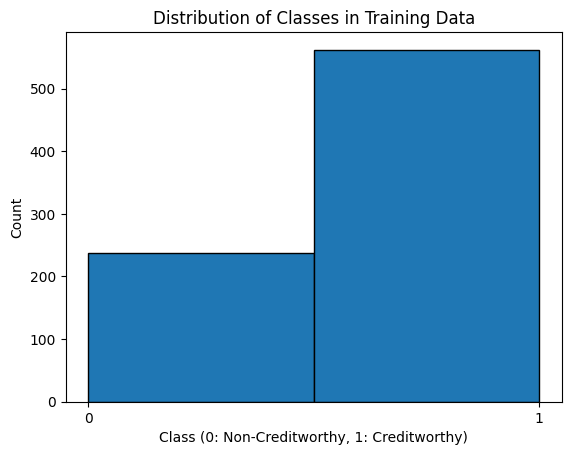

In [18]:
# Plot the distribution of classes in the training data
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()


In [19]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)

# Calculate metrics for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

# Print Random Forest metrics
print("Random Forest Metrics:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")


Random Forest Metrics:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90


In [20]:
# Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict on the test data
mlp_pred = mlp_model.predict(X_test)

# Calculate metrics for MLP
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

# Print MLP metrics
print("\nMLP Metrics:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")



MLP Metrics:
ROC AUC: 0.55
Accuracy: 0.71
Precision: 0.71
Recall: 0.99


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

Импорт необходимых библиотек

In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Загрузка данных и разделение на обучающую и тестовую выборки

In [27]:
# Load the dataset from the correct local path
data = pd.read_csv('C:/Users/l02ym/Downloads/german (2).csv', sep=';')
print(data.head())

# Define features (X) and target (y)
X = data.iloc[:, 1:].to_numpy()  # Feature data
y = data.iloc[:, 0].to_numpy()  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

Оптимизация гиперпараметров для RandomForest с использованием GridSearchCV

In [28]:
# Define the parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best score: {rf_grid_search.best_score_}")

# Use the best model to predict
rf_best_model = rf_grid_search.best_estimator_

# Predict on test data
rf_pred = rf_best_model.predict(X_test)

# Calculate metrics for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

# Print Random Forest metrics
print("Random Forest Metrics (After Optimization):")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best score: 0.7774867881313772
Random Forest Metrics (After Optimization):
ROC AUC: 0.67
Accuracy: 0.74
Precision: 0.78
Recall: 0.87


Оптимизация гиперпараметров для MLP с использованием GridSearchCV

In [29]:
# Define the parameter grid for MLPClassifier
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize MLPClassifier
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

# Initialize GridSearchCV
mlp_grid_search = GridSearchCV(estimator=mlp_model, param_grid=mlp_param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
mlp_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for MLP: {mlp_grid_search.best_params_}")
print(f"Best score: {mlp_grid_search.best_score_}")

# Use the best model to predict
mlp_best_model = mlp_grid_search.best_estimator_

# Predict on test data
mlp_pred = mlp_best_model.predict(X_test)

# Calculate metrics for MLP
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

# Print MLP metrics
print("\nMLP Metrics (After Optimization):")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score: 0.7037537664385684

MLP Metrics (After Optimization):
ROC AUC: 0.67
Accuracy: 0.70
Precision: 0.80
Recall: 0.75


Построение ROC кривой для оптимизированных моделей

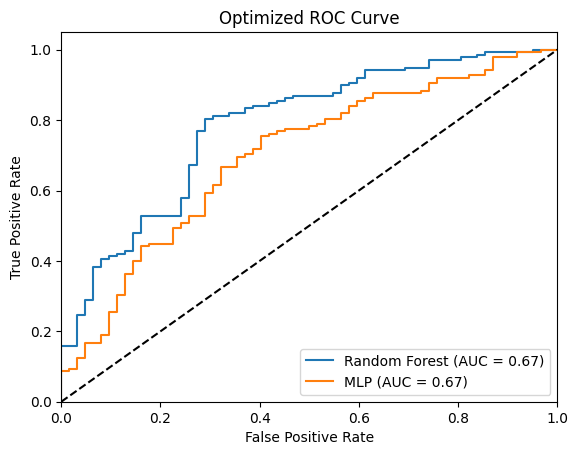

In [30]:
# Plot ROC Curve for optimized Random Forest and MLP
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:, 1])
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_best_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized ROC Curve')
plt.legend(loc='lower right')
plt.show()


Вывод:
В ходе лабораторной работы были проведены эксперименты с оптимизацией гиперпараметров моделей Random Forest и MLPClassifier с использованием GridSearchCV. Оптимизация показала улучшение параметров моделей, однако результаты ROC AUC остаются на уровне 0.67. Несмотря на это, модели демонстрируют хорошие результаты по метрикам Precision и Recall, что свидетельствует о высоком качестве предсказаний. В дальнейшем можно продолжить работу по улучшению точности моделей.